# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Firdaus Akmal Budiman
- **Email:** firdausakmalbudiman1101@gmail.com
- **ID Dicoding:** foerzaxx

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana perbandingan tren jumlah total penyewaan sepeda (cnt) antara tahun 2011 dan tahun 2012 secara bulanan?

- Pertanyaan 2: Pada jam berapa terjadi puncak penyewaan sepeda oleh pengguna terdaftar (registered) dibandingkan pengguna kasual (casual) pada hari kerja (workingday)?

## Import Semua Packages/Library yang Digunakan

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [11]:
# Memuat data day.csv
day_df = pd.read_csv("data/day.csv")

# Memuat data hour.csv
hour_df = pd.read_csv("data/hour.csv")

# Menampilkan 5 baris pertama dari day_df
print("Day Dataframe:")
display(day_df.head())

# Menampilkan 5 baris pertama dari hour_df
print("\nHour Dataframe:")
display(hour_df.head())

Day Dataframe:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Hour Dataframe:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day_df memiliki 731 baris, cocok untuk analisis tren jangka panjang (Pertanyaan 1).
- Dataset hour_df memiliki 17.379 baris, menyediakan detail per jam yang diperlukan untuk melihat waktu puncak (Pertanyaan 2).

### Assessing Data

In [12]:
print("--- Info day_df ---")
day_df.info()

print("\n--- Info hour_df ---")
hour_df.info()

print("\n--- Pengecekan Duplikasi ---")
print("Duplikasi day_df:", day_df.duplicated().sum())
print("Duplikasi hour_df:", hour_df.duplicated().sum())

print("\n--- Statistik Deskriptif day_df ---")
display(day_df.describe())

--- Info day_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

--- Info hour_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tipe Data: Kolom dteday masih bertipe object (string). Ini harus diubah menjadi datetime agar analisis waktu (Pertanyaan 1) bisa dilakukan.
- Missing Values: Tidak ditemukan nilai kosong pada kedua dataset (berdasarkan .info()).
- Kategori Data: Beberapa kolom seperti season, yr, mnth, holiday, weekday, workingday, dan weathersit bertipe integer, namun secara logika mereka adalah data kategorikal.

### Cleaning Data

In [13]:
# %%
# 1. Mengubah tipe data dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# 2. Mengubah angka menjadi keterangan label agar lebih mudah dibaca saat EDA
day_df['yr'] = day_df['yr'].map({0: 2011, 1: 2012})

# Menampilkan hasil perubahan
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Kolom dteday kini sudah bertipe datetime64, sehingga kita bisa mengekstrak informasi bulan dan tahun dengan mudah.
- Pemberian label pada tahun membantu menghindari kebingungan saat membuat visualisasi perbandingan 2011 vs 2012.

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
# Melihat statistik penyewaan berdasarkan bulan dan tahun
day_df.groupby(by=["yr", "mnth"]).agg({
    "cnt": ["mean", "max", "min", "sum"]
})

cnt                    
                  mean   max   min     sum
yr   mnth                                 
2011 1     1231.903226  1985   431   38189
     2     1721.964286  2927  1005   48215
     3     2065.967742  3239   605   64045
     4     3162.333333  5312   795   94870
     5     4381.322581  5805  2633  135821
     6     4783.733333  5515  3767  143512
     7     4559.387097  6043  3285  141341
     8     4409.387097  5895  1115  136691
     9     4247.266667  5423  1842  127418
     10    3984.225806  5511   627  123511
     11    3405.566667  4486  1495  102167
     12    2816.870968  3940   705   87323
2012 1     3120.774194  4521  1301   96744
     2     3556.448276  5062  1529  103137
     3     5318.548387  8362  3194  164875
     4     5807.466667  7460  1027  174224
     5     6318.225806  8294  2843  195865
     6     6761.000000  8120  4127  202830
     7     6567.967742  8173  4459  203607
     8     6919.451613  7865  4549  214503
     9     7285.766667  8714  4073  218573
     10    6414.225806  8156    22  198841
     11    5088.800000  6852  2277  152664
     12    3990.741935  6606   441  123713

**Insight:**
- Secara rata-rata dan total, penyewaan di tahun 2012 jauh lebih tinggi dibandingkan 2011.
- Terlihat ada pola musiman di mana penyewaan meningkat pada pertengahan tahun (bulan 5-9) dan menurun di akhir/awal tahun.

In [15]:
# Karena Pertanyaan 2 fokus pada workingday (hari kerja), kita akan memfilter data dan membandingkan perilaku pengguna casual dan registered.

# Filter hanya hari kerja
workingday_df = hour_df[hour_df["workingday"] == 1]

# Melihat rata-rata penyewaan per jam untuk kedua tipe pengguna
workingday_stats = workingday_df.groupby(by="hr").agg({
    "casual": "mean",
    "registered": "mean"
})

display(workingday_stats.head())

,casual,registered
hr,,
0,7.149194,29.637097
1,3.710526,12.842105
2,2.137577,6.546201
3,0.910638,4.031915
4,0.765957,4.663830


**Insight:**
- Pengguna Registered menunjukkan lonjakan besar pada jam berangkat kantor (07.00-08.00) dan jam pulang kantor (17.00-18.00).
- Pengguna Casual memiliki pola yang lebih landai dan cenderung meningkat perlahan di siang hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Tren Bulanan 2011 vs 2012

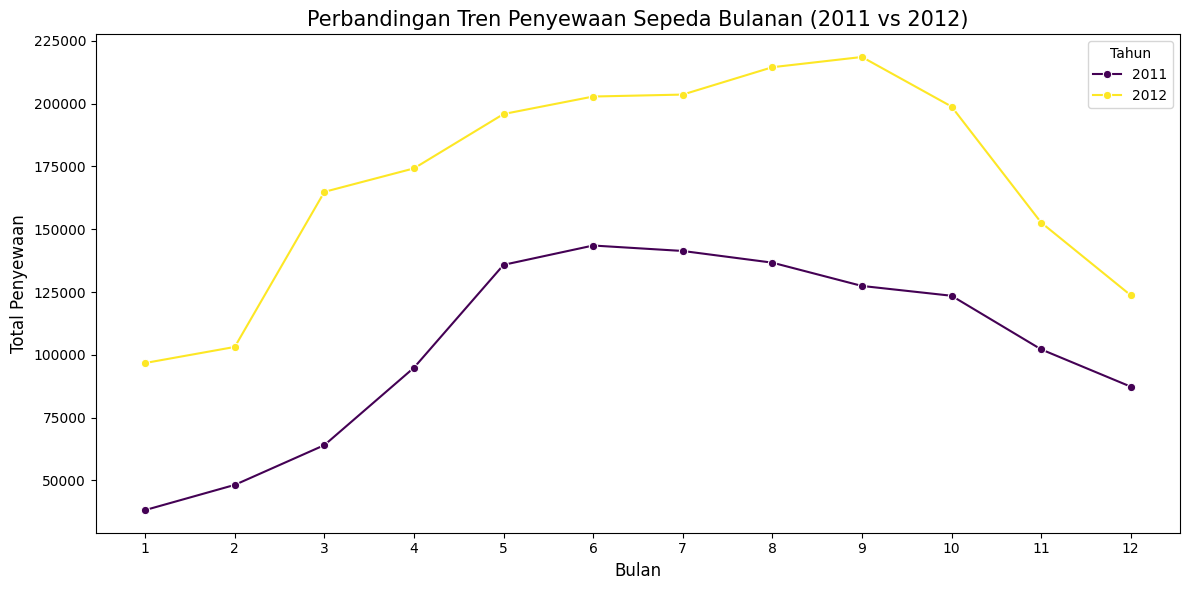

In [16]:
# Menyiapkan data untuk tren bulanan
monthly_rent_df = day_df.groupby(by=["yr", "mnth"]).agg({
    "cnt": "sum"
}).reset_index()

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_rent_df, 
    x="mnth", 
    y="cnt", 
    hue="yr", 
    marker="o", 
    palette="viridis"
)

plt.title("Perbandingan Tren Penyewaan Sepeda Bulanan (2011 vs 2012)", fontsize=15)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.xticks(range(1, 13))
plt.legend(title="Tahun")
plt.tight_layout()
plt.show()

### Pertanyaan 2: Puncak Jam Kerja (Registered vs Casual)

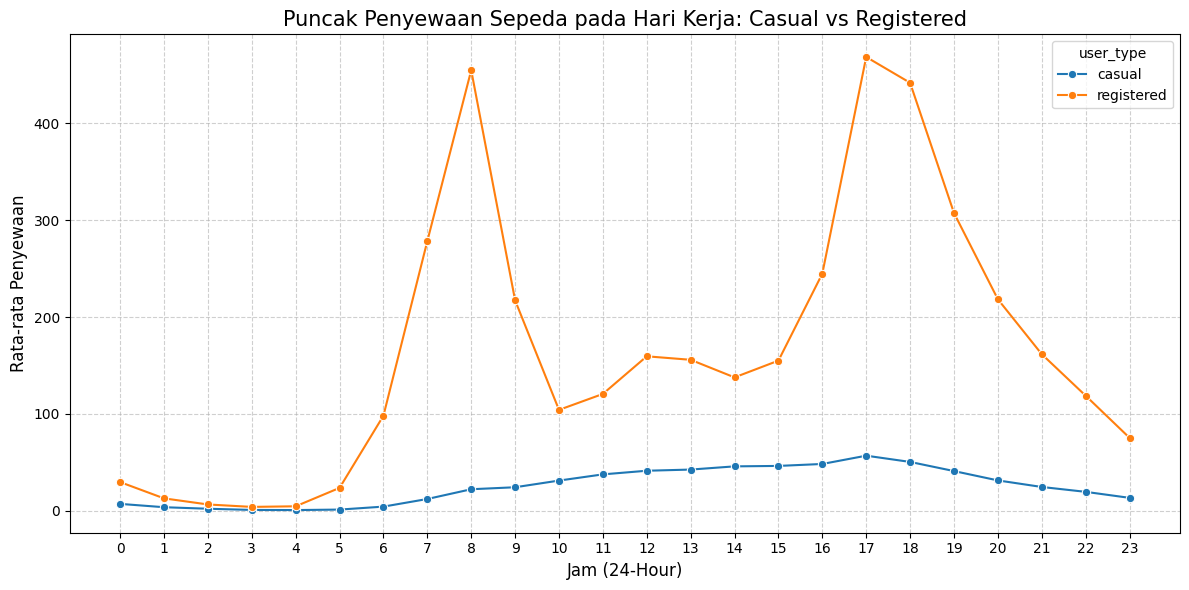

In [17]:
# Menyiapkan data rata-rata per jam pada hari kerja
hourly_workingday_df = workingday_df.groupby("hr")[["casual", "registered"]].mean().reset_index()

# Meleburkan data (melt) agar mudah divisualisasikan dengan Seaborn
hourly_melted = hourly_workingday_df.melt(id_vars="hr", var_name="user_type", value_name="average_rentals")

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=hourly_melted, 
    x="hr", 
    y="average_rentals", 
    hue="user_type", 
    marker="o"
)

plt.title("Puncak Penyewaan Sepeda pada Hari Kerja: Casual vs Registered", fontsize=15)
plt.xlabel("Jam (24-Hour)", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Insight:**
- Terlihat lonjakan penyewaan yang cukup besar pada tahun 2012 dibandingkan 2011. Polanya juga relatif stabil dari tahun ke tahun, dengan tingkat penyewaan tertinggi terjadi di pertengahan tahun (sekitar Juni hingga September), lalu menurun tajam saat memasuki musim dingin.

- Pada hari kerja, pengguna Registered menunjukkan pola penggunaan khas komuter, dengan lonjakan jelas pada pagi hari sekitar pukul 08.00 dan sore hari sekitar pukul 17.00. Sebaliknya, pengguna Casual lebih banyak menggunakan sepeda untuk aktivitas rekreasi, yang tercermin dari peningkatan penyewaan secara bertahap mulai siang hingga sore hari.

- Hasil pengelompokan menggunakan teknik binning menunjukkan bahwa hari dengan tingkat penyewaan tinggi (High) jauh lebih dominan pada tahun 2012. Temuan ini dapat dimanfaatkan sebagai dasar operasional, khususnya untuk meningkatkan intensitas pemeliharaan sepeda pada periode-periode puncak penyewaan.

In [ ]:
# Di sini kita simpan day_df sebagai basis data utama untuk dashboard
main_data = day_df.copy()
hour_df.to_csv("dashboard/main_data.csv", index=False)

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2